In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from tqdm import tqdm_notebook
from scipy.optimize import minimize, leastsq
from scipy.interpolate import interp1d
from astropy import units
import matplotlib.gridspec as gridspec

starbins = [0.05, 0.3, 0.5, 0.8, 1.7, 3.0]

%load_ext autoreload
%autoreload 2

from selection import *
from tools import *
from plot import *

COLOR = 'black'

plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

parula, cinds, oppo = parula_cmap(np.ones(5))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from matplotlib.colors import LinearSegmentedColormap

clist0 = np.array(['EA8F3C', 'EB6A41', '69469D', '241817'])
clist1 = np.array(['66C6C6', '2B8D9D', '19536C', '123958', '121422'])

def hex_to_rgb(h):
    if '#' in h:
        h = h.lstrip('#')   
    hlen = int(len(h))
    rgb = tuple(int(h[i:int(i+hlen/3)], 16) / 255.0 for i in range(0, hlen, int(hlen/3)))
    return rgb

def make_cmap(clist, name='sequential'):
    rgb_tuples = []

    for c in clist:
        rgb_tuples.append(hex_to_rgb(c))

    cm = LinearSegmentedColormap.from_list(
            name, rgb_tuples, N=2048)
    return cm

cm = make_cmap(clist0, name='halloween')
cm1 = make_cmap(clist1, name='ocean')
parulacmap = LinearSegmentedColormap.from_list('sequential', parula)

In [4]:
allflares = Table.read('all_flares_param_catalog.tab', format='csv')
stars = Table.read('all_star_param_catalog_ruwe.tab', format='csv')
cmd_bprp, cmd_mg, cmd_mass, cmd_teff = read_mamajek()

In [5]:
filters = [i for i in allflares.colnames if 'passed_' in i]

In [6]:
allflares = allflares[(allflares[filters[0]]=='True')&
                      (allflares[filters[1]]=='True')&
                      (allflares[filters[2]]=='True')&
                      (allflares[filters[3]]=='True')]

## Convert RUWE to physical distance

/Users/arcticfox/Documents/flares/criticality/selection.py:23: RuntimeWarning: invalid value encountered in sqrt
  deltheta = interp_sigAL(stars['M_G'].data.data) * np.sqrt(stars['RUWE'].data**2-1)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


(-1.0, 5.0)

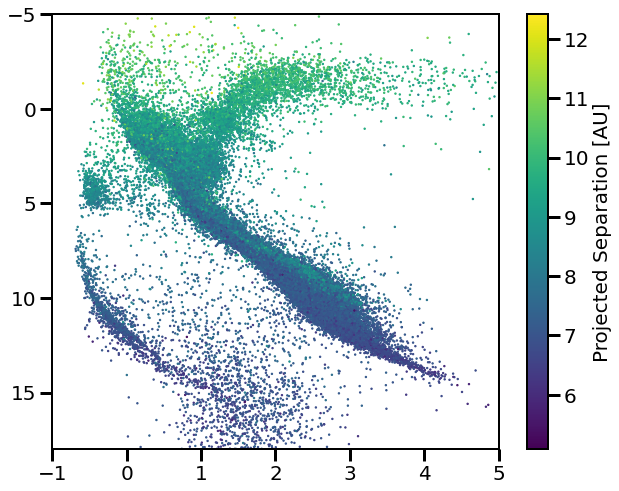

In [10]:
plt.figure(figsize=(10,8))
deltaa = ruwe_to_distance(stars)
plt.scatter(stars['bp_rp'], stars['M_G'],
            c=np.log10(deltaa.to(units.AU).value), s=2)
plt.colorbar(label='Projected Separation [AU]')
plt.ylim(18,-5)
plt.xlim(-1,5)

In [11]:
%load_ext autoreload
%autoreload 2
from plot import *
from selection import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
s = np.zeros(len(stars))
s[stars['N_flares_per_day']<0.1] = 2
s[(stars['N_flares_per_day']>=0.1) & (stars['N_flares_per_day']<0.2)] = 4
s[stars['N_flares_per_day']>=0.2] = 7

In [54]:
allflares[allflares['prob']>0.5]

TIC_ID,OBS_Sector,TICv8_ra,TICv8_dec,TICv8_Teff,TICv8_Tmag,TICv8_d,BANYAN_BEST_HYP,tpeak,amp,dur,rise,fall,prob,passed_snr_filter,passed_single_outlier_filter,passed_variability_filter,passed_eb_filter,weights,teff,e_teff,rp,bp,lum,rad,H,J,K,scaling,flare_energy_erg,RUWE,M_G,bp_rp
int64,str38,float64,float64,float64,float64,float64,str6,float64,float64,float64,float64,float64,float64,str5,str5,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1078,11,218.813157,-28.228133,4861.0,9.655,816.675,FIELD,2458609.06796,0.002379,0.054863,0.0001,0.00169,0.54,True,True,True,True,0.020958438898172605,4861.0,122.0,9.61644,10.9063,nan,10.2938,8.153,8.682,7.948,nan,nan,1.00620940093219,0.7509338087530644,1.2898435592651367
1078,11,218.813157,-28.228133,4861.0,9.655,816.675,FIELD,2458616.14292,0.003428,0.054864,0.0001,0.001496,0.77,True,True,True,True,0.029885181391838714,4861.0,122.0,9.61644,10.9063,nan,10.2938,8.153,8.682,7.948,nan,nan,1.00620940093219,0.7509338087530644,1.2898435592651367
1078,11,218.813157,-28.228133,4861.0,9.655,816.675,FIELD,2458618.52901,0.002725,0.054869,0.0001,0.005376,0.74,True,True,True,True,0.02872082367527357,4861.0,122.0,9.61644,10.9063,nan,10.2938,8.153,8.682,7.948,nan,nan,1.00620940093219,0.7509338087530644,1.2898435592651367
1275,11,218.834618,-27.923627,5820.0,9.589,115.982,FIELD,2458605.01654,0.004727,0.054869,0.0001,0.003164,0.63,True,True,True,True,0.024451512047868038,5819.9,123.87,9.54119,10.3669,1.06120181,1.01326,8.719,8.961,8.62,32.870786813924376,3.4633202988332366e+31,1.0329199744065014,4.699913831027136,0.825688362121582
1275,11,218.834618,-27.923627,5820.0,9.589,115.982,FIELD,2458606.20961,0.008234,0.060451,0.0001,0.005906,0.96,True,True,True,True,0.03725944693008463,5819.9,123.87,9.54119,10.3669,1.06120181,1.01326,8.719,8.961,8.62,32.870786813924376,6.646520721079826e+31,1.0329199744065014,4.699913831027136,0.825688362121582
1275,11,218.834618,-27.923627,5820.0,9.589,115.982,FIELD,2458606.511,0.008698,0.055566,0.0001,0.001881,0.93,True,True,True,True,0.036095089213519484,5819.9,123.87,9.54119,10.3669,1.06120181,1.01326,8.719,8.961,8.62,32.870786813924376,6.453696662715534e+31,1.0329199744065014,4.699913831027136,0.825688362121582
1275,11,218.834618,-27.923627,5820.0,9.589,115.982,FIELD,2458617.1818,0.003652,0.054867,0.0001,0.00294,0.71,True,True,True,True,0.027556465958708424,5819.9,123.87,9.54119,10.3669,1.06120181,1.01326,8.719,8.961,8.62,32.870786813924376,2.67560497235472e+31,1.0329199744065014,4.699913831027136,0.825688362121582
1307,11,218.813657,-27.858749,5268.0,10.146,113.297,FIELD,2458605.46516,0.003425,0.05487,0.0001,0.002298,0.62,True,True,True,True,0.024063392809012988,5268.0,137.572,10.0963,11.1118,0.561601758,0.899654,9.0,9.4,8.893,22.06639270826107,8.915121506120288e+30,0.9893452686194852,5.4001725969446595,1.0155773162841797
1307,11,218.813657,-27.858749,5268.0,10.146,113.297,FIELD,2458605.75405,0.00329,0.054874,0.0001,0.007714,0.67,True,True,True,True,0.026003989003288232,5268.0,137.572,10.0963,11.1118,0.561601758,0.899654,9.0,9.4,8.893,22.06639270826107,8.564346848028686e+30,0.9893452686194852,5.4001725969446595,1.0155773162841797


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later


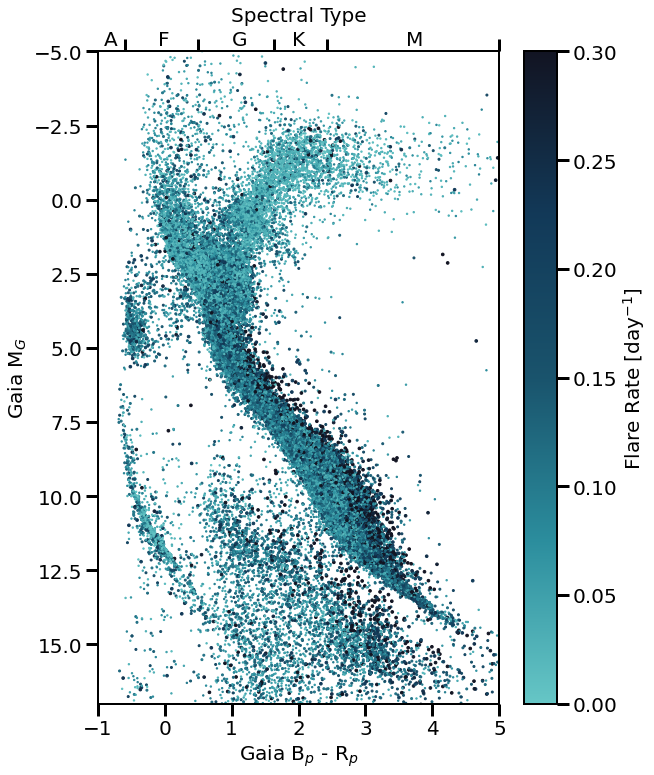

In [55]:
blue = ruwe_cmap()
halloween = flarerate_cmap()

fig, ax1 = plt.subplots(figsize=(9,12), sharex=False)
fig.set_facecolor('w')
flaresvmin=0
flaresvmax=0.3
im = ax1.scatter(stars['bp_rp'],
                 stars['M_G'],
                 c=stars['N_flares_per_day'],
                 s=s,
                 vmin=flaresvmin,
                 vmax=flaresvmax,
                 cmap=blue,#.reversed(), 
                 zorder=3)
fig.colorbar(im, label='Flare Rate [day$^{-1}$]')
xticks = [-1,0,1,2,3,4,5]
upxticks = np.array([cmd_mass[cmd_bprp>=0][0],
                     cmd_mass[cmd_bprp>=2][0],
                     cmd_mass[cmd_bprp>=4][0]])
ax1.set_xlim(-1, 5)
ax1.set_xticks(xticks)

plt.ylim(17,-5)

twinticks = [0.327, 1.21, 2.13, 2.78, 4.86]
ax2 = ax1.twiny()
ax2.set_xticks(twinticks)
ax2.set_xticklabels([])

types = ['A','F','G','K','M']
xvals = [-0.9, -0.1, 1, 1.9, 3.6]
for i in range(len(types)):
    ax1.text(y=-5.2, x=xvals[i], s=types[i])
ax1.text(y=-6.2, x=2, s='Spectral Type', va='center', ha='center')

ax1.set_xlabel('Gaia B$_p$ - R$_p$')
ax1.set_ylabel('Gaia M$_G$')
plt.subplots_adjust(hspace=0.1)
ax1.set_rasterized(True)
plt.savefig('hr.pdf', rasterize=True, bbox_inches='tight', dpi=300)

## Down select to the Main Sequence

In [56]:
model = dist_to_ms(stars, starbins)
ms_dist = np.abs(stars['M_G'] - model(stars['bp_rp']))
ms_dist_all = np.abs(allflares['M_G']-model(allflares['bp_rp']))

# Measuring Slopes -- Full Sample

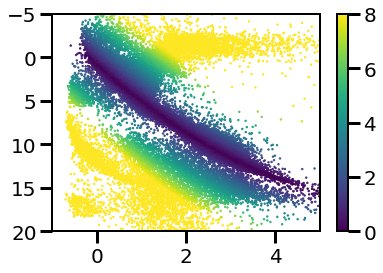

In [57]:
absmag = stars['M_G'] + 0.0

plt.scatter(stars['bp_rp'], absmag,
            c=np.abs(absmag - model(stars['bp_rp'])),
            s=2, vmin=0, vmax=8)
plt.ylim(20,-5)
plt.xlim(-1,5)
plt.colorbar()
ms_dist = np.abs(stars['M_G'] - model(stars['bp_rp']))
ms_dist_all = np.abs(allflares['M_G']-model(allflares['bp_rp']))

In [58]:
g_dist, g_dist_all = dist_to_giant(stars, allflares, ms_dist, ms_dist_all)

### Initial Guesses

In [59]:
%load_ext autoreload
%autoreload 2
from tools import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
stars

TIC_ID,OBS_Sector,TICv8_ra,TICv8_dec,TICv8_Teff,TICv8_Tmag,TICv8_d,BANYAN_BEST_HYP,N_flares,N_flares_per_day,flare_amp_max,flare_amp_median,flare_dur_max,flare_dur_median,flare_prob_max,flare_prob_median,Total_obs_time,flare_rates,teff,e_teff,rp,bp,lum,rad,H,J,K,source_id,bp_rp,phot_g_mean_mag,parallax,astrometric_chi2_al,astrometric_n_good_obs_al,phot_bp_mean_flux_over_error,parallax_over_error,phot_rp_mean_flux_over_error,RUWE,M_G
int64,str38,float64,float64,float64,float64,float64,str6,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1078,11,218.813157,-28.228133,4861.0,9.655,816.675,FIELD,4,0.07956444396528488,0.003428,0.002714,0.054869,0.054863,0.77,0.71,25.76527777777778,0.10595655220742818,4861.0,122.0,9.61644,10.9063,nan,10.2938,8.153,8.682,7.948,6.222126444636599e+18,1.2898435592651367,10.311180114746094,1.19898903380863,160.21450805664062,106.0,790.595458984375,20.84502410888672,497.88214111328125,1.00620940093219,0.7509338087530644
1275,11,218.834618,-27.923627,5820.0,9.589,115.982,FIELD,4,0.12536251415018057,0.008698,0.00648,0.060451,0.055218,0.96,0.82,25.76527777777778,0.12536251415018057,5819.9,123.87,9.54119,10.3669,1.06120181,1.01326,8.719,8.961,8.62,6.222239724396885e+18,0.825688362121582,10.021866798400879,8.59353368728468,240.35179138183594,116.0,845.9616088867188,182.05783081054688,666.5332641601562,1.0329199744065014,4.699913831027136
1307,11,218.813657,-27.858749,5268.0,10.146,113.297,FIELD,3,0.05006738181230122,0.003425,0.00329,0.056947,0.054874,0.67,0.62,25.76527777777778,0.07141393994932886,5268.0,137.572,10.0963,11.1118,0.561601758,0.899654,9.0,9.4,8.893,6.222241171802705e+18,1.0155773162841797,10.6712646484375,8.797625576636397,255.01373291015625,173.0,1700.4886474609375,248.4512176513672,964.3053588867188,0.9893452686194852,5.4001725969446595
1454,11,218.755263,-27.601079,6058.0,10.002,196.799,FIELD,3,0.0652040321276481,0.00334,0.002633,0.05487,0.054868,0.6,0.55,25.76527777777778,0.0652040321276481,6058.0,nan,9.95369,10.7078,nan,1.25451,9.186,9.442,9.081,6.223004366015751e+18,0.754115104675293,10.399602890014648,0.5657055905580602,9152.17578125,82.0,689.2665405273438,1.152470350265503,509.9847412109375,7.607682242236453,3.9294884534705883
8610,11,219.060014,-27.605315,2981.0,14.228,54.864,FIELD,4,0.112554579267964,0.050022,0.047635,0.054936,0.054926,0.99,0.68,25.76527777777778,0.112554579267964,2981.0,157.0,14.3588,17.8177,0.004038154,0.238243,11.709,12.286,11.385,6.22227415285569e+18,3.4589385986328125,15.71449089050293,18.200321959747363,543.2988891601562,119.0,78.1392822265625,116.84416961669922,388.1961975097656,1.218359081209255,12.018053551648585
8842,11,219.030557,-27.22073,29262.0,15.096,1207.97,FIELD,3,0.10750902916284834,0.137976,0.12364,0.056038,0.055023,0.99,0.96,25.76527777777778,0.10750902916284834,29262.0,500.0,15.1565,14.8457,16.9102764,0.16,15.407,15.385,15.412,6.223051546232338e+18,-0.3107643127441406,15.008877754211426,0.8064570264838767,184.3882293701172,116.0,108.7310791015625,9.970955848693848,320.41595458984375,0.9047559334298276,4.598597010750437
10175,11,219.017859,-24.981375,4233.0,11.228,77.944,FIELD,4,0.10246347905773272,0.006997,0.005278,0.056261,0.054872,0.88,0.6,25.76527777777778,0.10246347905773272,4233.4,122.299,11.1662,12.8379,0.101243086,0.591503,9.44,10.089,9.256,6.223939363214988e+18,1.6717290878295898,12.030518531799316,12.801852564833375,139.35345458984375,105.0,366.734619140625,147.52987670898438,962.8167114257812,1.0102443689770126,7.571605084090515
10238,11,219.021985,-24.843958,5625.0,9.779,124.862,FIELD,2,0.058606005067112284,0.00513,0.004618,0.055564,0.055214,0.85,0.76,25.76527777777778,0.058606005067112284,5624.7,136.029,9.73341,10.5574,1.03253186,1.07005,8.889,9.216,8.793,6.272003105273964e+18,0.823944091796875,10.211559295654297,7.981303910692585,230.4019775390625,10

In [60]:
init_slopes = np.zeros(len(starbins))
#init_errs = np.zeros(len(starbins)-1)
init_binsizes = np.zeros(len(starbins))
init_offsets = np.zeros(len(starbins))

dat_collection = []

bins = np.logspace(np.log10(1), np.log10(500),20)

for i in range(len(starbins)):
      
    if i < len(starbins)-1:
        
        inds = np.where((cmd_mass>=starbins[i]) & (cmd_mass<starbins[i+1]))[0]
    
        if i == 1 or i == 3:
            lowlim = previous + 0.0
        else:
            lowlim = cmd_bprp[inds][-1] + 0.0
    
        dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                        (allflares['bp_rp']<=  lowlim) &
                        (ms_dist_all < 2) & (allflares['prob']>=0.5)]

        #d = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
        #                (allflares['bp_rp']<  lowlim) &
        #                (ms_dist_all < 2) & (allflares['prob']>=0.9) & 
        #                (allflares['RUWE'] >=1.4)]

        s = stars[(stars['bp_rp']>= cmd_bprp[inds][0]) &
                  (stars['bp_rp']<  lowlim) &
                  (ms_dist < 2)]
        
        print('$[', cmd_bprp[inds][0],',', lowlim, ']$ & $[', 
              starbins[i], ',', starbins[i+1], 
             ']$ &', len(s), '&', len(dat))#, '&', len(d))
        
    else:
        dat = allflares[(g_dist_all < 3) & (allflares['prob']>=0.5)]
        s = stars[(g_dist < 2)]
    
        print('giants', len(s), '&', len(dat))
    
    if i < 2:
        slope, n, offset = amp_slope_fit(dat, 
                                              bins=bins, i=5, plot=False, get_err=False)
        
    else:
        slope, n, offset = amp_slope_fit(dat, 
                                              bins=bins, plot=False, get_err=False)
        
    init_slopes[i] = slope
    #init_errs[i] = err
    init_binsizes[i] = len(dat)
    init_offsets[i] = offset
    
    dat_collection.append(dat)

    previous = cmd_bprp[inds][0]
    
    print(slope)#, '+/-', err)
    print('---')
#plt.ylim(20,-5)
#plt.xlim(-1,5)

$[ 2.78 , 4.86 ]$ & $[ 0.05 , 0.3 ]$ & 9241 & 59150
-1.2872616701500808
---
$[ 2.13 , 2.78 ]$ & $[ 0.3 , 0.5 ]$ & 20124 & 108963
-1.5946617895016886
---
$[ 1.21 , 2.09 ]$ & $[ 0.5 , 0.8 ]$ & 17914 & 139445
-1.6527348810276814
---
$[ 0.377 , 1.21 ]$ & $[ 0.8 , 1.7 ]$ & 85609 & 571556
-2.4125210076758252
---
$[ -0.12 , 0.327 ]$ & $[ 1.7 , 3.0 ]$ & 3770 & 20447
-0.9383130968264995
---
giants 5157 & 10965
-1.2066594865280487
---


/Users/arcticfox/Documents/flares/criticality/tools.py:53: RuntimeWarning: divide by zero encountered in log10
  logn = np.log10(n)
/Users/arcticfox/Documents/flares/criticality/tools.py:35: RuntimeWarning: invalid value encountered in power
  fit = b * x**m


In [26]:
bins = np.logspace(np.log10(1), np.log10(500),20)
histplots = []
lowlim = []
upplim = []
for i in range(len(starbins)):
    #inds = np.where((cmd_mass>=starbins[i]) & (cmd_mass<starbins[i+1]))[0]
    #if i == 1 or i == 3:
    #    p = previous + 0.0
    #else:
    #    p = cmd_bprp[inds][-1] + 0.0
    fig, ax = plt.subplots(figsize=(10,10))
    dat = dat_collection[i][dat_collection[i]['prob']>=0.9]
    
    n = ax.hist(dat['amp']*100, bins=bins,
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.4)
    histplots.append(n)
    
    dat = dat_collection[i][dat_collection[i]['prob']>=0.99]
    
    n = ax.hist(dat['amp']*100, bins=bins, 
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.4)
    lowlim.append(n[0])
    
    dat = dat_collection[i][dat_collection[i]['prob']>0.5]
    
    n = ax.hist(dat['amp']*100, bins=bins, 
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.4)
    upplim.append(n[0])
    
    previous = cmd_bprp[inds][0] + 0.0

    plt.yscale('log')
    plt.xscale('log')
    plt.close()
    

### MCMC fits

In [27]:
%load_ext autoreload
%autoreload 2
from tools import run_mcmc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 5000/5000 [00:31<00:00, 158.32it/s]


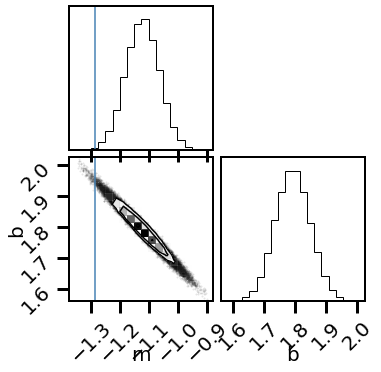

  0%|          | 16/5000 [00:00<00:31, 158.92it/s]

0 [-1.123808568700218, 0.05818284781253591, 0.05781181419478432] [1.7919688978368518, 0.0568846760781454, 0.05728121868583136]


100%|██████████| 5000/5000 [00:30<00:00, 163.97it/s]


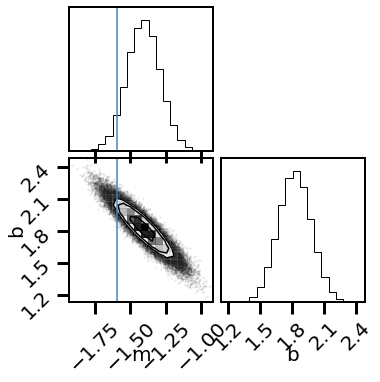

100%|██████████| 5000/5000 [00:31<00:00, 160.17it/s]


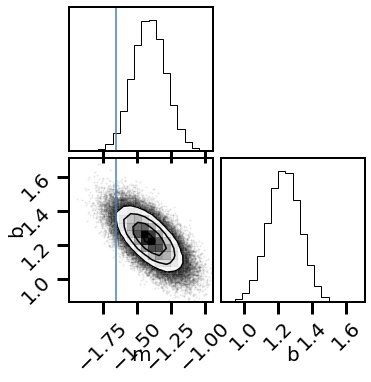

  0%|          | 15/5000 [00:00<00:33, 148.86it/s]

2 [-1.4077777844113317, 0.12086746299875428, 0.12188866412089627] [1.2360587643753225, 0.09518591230972118, 0.095032056957842]


100%|██████████| 5000/5000 [00:30<00:00, 164.04it/s]


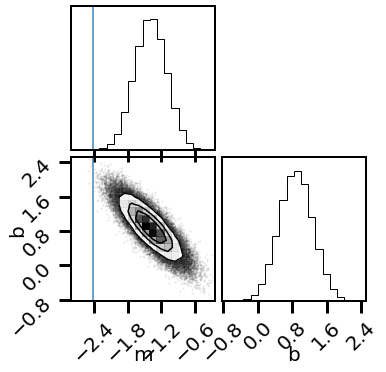

  0%|          | 16/5000 [00:00<00:32, 155.10it/s]

3 [-1.3935222916635326, 0.28457566674599555, 0.2859358898775317] [0.8833502955406515, 0.39007810966380235, 0.39129197293937634]


100%|██████████| 5000/5000 [00:33<00:00, 151.06it/s]


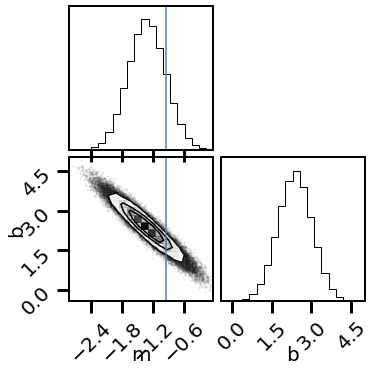

  0%|          | 13/5000 [00:00<00:39, 126.97it/s]

4 [-1.318764566429259, 0.3644329699258131, 0.36661406211565295] [2.37419920979723, 0.6509322592648623, 0.6440887531224146]


100%|██████████| 5000/5000 [00:32<00:00, 152.80it/s]


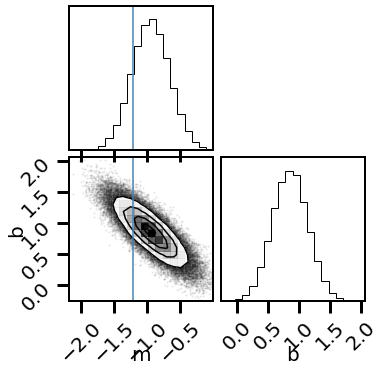

5 [-0.9488601880320136, 0.2842461127286655, 0.2846413934881322] [0.8560550337490458, 0.28630031167856984, 0.28698189777024363]
[[-1.12380857  0.05818285  0.05781181]
 [-1.40770152  0.11686402  0.11636948]
 [-1.40777778  0.12086746  0.12188866]
 [-1.39352229  0.28457567  0.28593589]
 [-1.31876457  0.36443297  0.36661406]
 [-0.94886019  0.28424611  0.28464139]]


In [287]:
mcmc_fits = np.zeros((len(init_slopes),3))
all_samples = []
mcmc_offsets = np.zeros((len(init_slopes),3))

np.random.seed(123)

for i in range(len(init_slopes)):

    x = (histplots[i][1][:-1] + histplots[i][1][1:]) / 2
    y = histplots[i][0] + 0.0
    initguess = [init_slopes[i], init_offsets[i]]

    if i == 0 or i == 4:
        samples, fits, offsets = run_mcmc(x, y, 
                                 lowlim[i], upplim[i], 
                                 initguess, 
                                 mask=np.arange(5,len(x)-1,1,dtype=int), 
                                 plot_chains=False)
        print(i, fits, offsets)
        mcmc_fits[i] = fits
        mcmc_offsets[i] = offsets
    elif i == 1:
        samples, fits, offsets = run_mcmc(x, y, 
                                 lowlim[i], upplim[i], 
                                 initguess, 
                                 mask=np.arange(4,len(x)-1,1,dtype=int), 
                                 plot_chains=False)
        mcmc_fits[i] = fits
        mcmc_offsets[i] = offsets
    elif i == 2 or i == 3:
        samples, fits, offsets = run_mcmc(x, y, 
                                 lowlim[i], upplim[i], 
                                 initguess, 
                                 mask=np.arange(0,len(x)-1,1,dtype=int), 
                                 plot_chains=False)
        print(i, fits, offsets)
        mcmc_fits[i] = fits
        mcmc_offsets[i] = offsets
    else:
        samples, fits, offsets = run_mcmc(x, y, 
                                 lowlim[i], upplim[i], 
                                 initguess, 
                                 mask=np.arange(0,len(y)-4,1,dtype=int),
                                 plot_chains=False)
        print(i, fits, offsets)
        mcmc_fits[i] = fits
        mcmc_offsets[i] = offsets

    
    all_samples.append(samples)
print(mcmc_fits)
np.save('mcmc_fits.npy', mcmc_fits)

In [268]:
%load_ext autoreload
%autoreload 2
from plot import plot_slopes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/arcticfox/Documents/flares/criticality/plot.py:157: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(starbins)


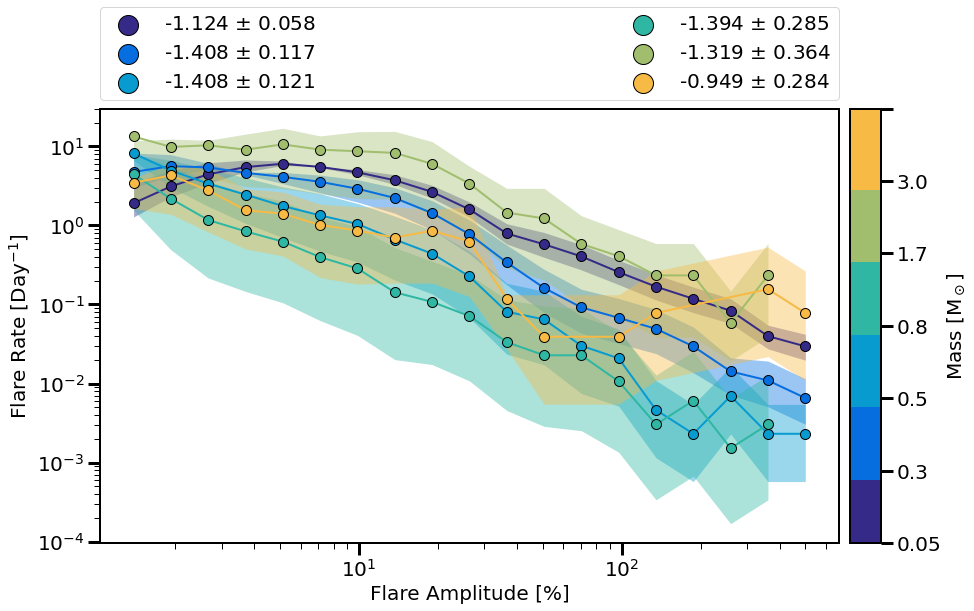

In [289]:
plot_slopes(histplots, lowlim, upplim, mcmc_fits, starbins, save=False)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later


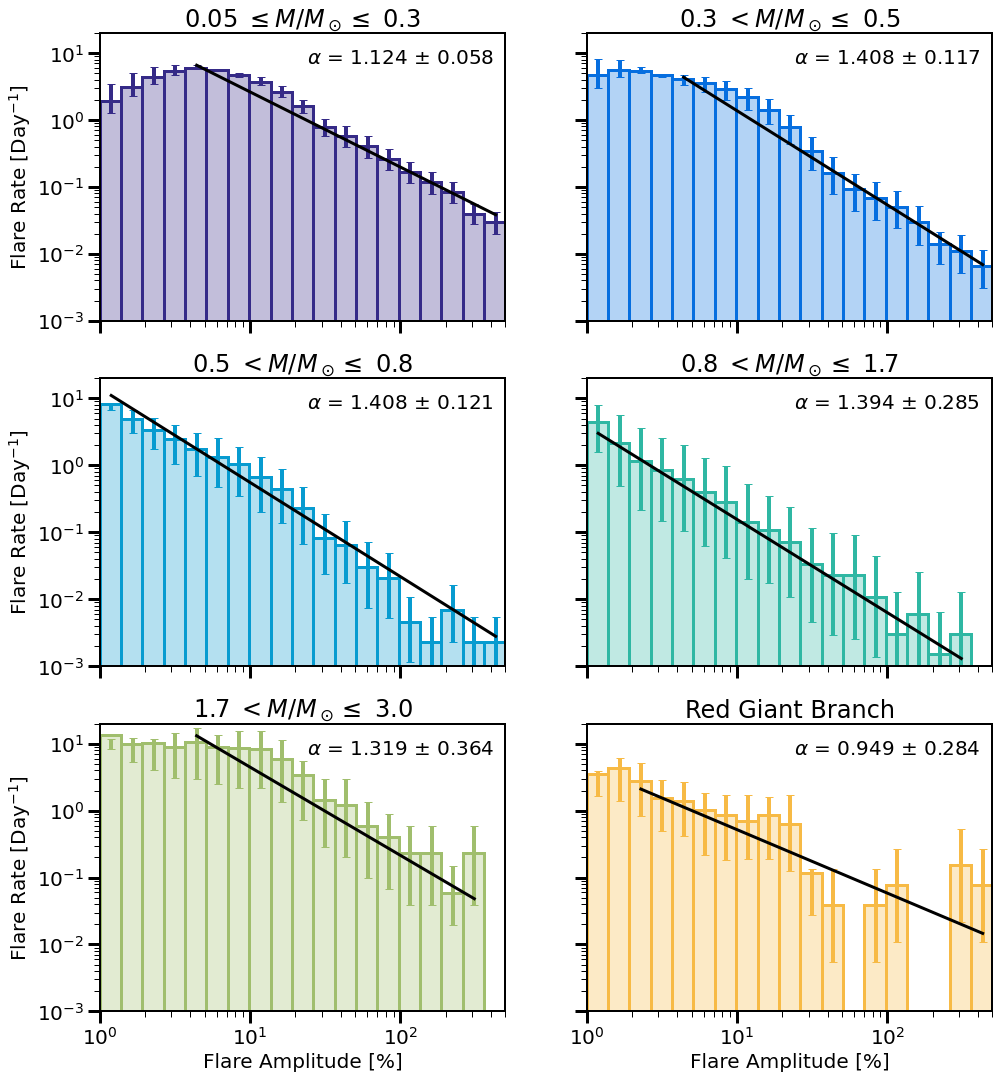

In [37]:
mcmc_fits = np.load('mcmc_fits.npy')

parula, cinds, oppo = parula_cmap(histplots)
fig, axes = plt.subplots(figsize=(16,18), ncols=2, nrows=3,
                                                         sharex=True, sharey=True)
fig.set_facecolor('w')
cinds = parula[np.linspace(0, 210, len(histplots), dtype=int)]
add_offset=np.full(len(cinds), 10)
add_offset[0] += 20
add_offset[-2] += 80
add_offset[3] -= 10
add_offset[1] += 20
add_offset[-1] -= 8

i = 0
for ax in axes.reshape(-1):
    q = histplots[i][0] > 0
    dat = dat_collection[i][dat_collection[i]['prob']>=0.9]
    
    
    ax.hist(dat['amp']*100, bins=bins,
            weights=np.full(len(dat['amp']),
                            1.0/np.nansum(dat['weights'])),
            alpha=0.3, color=cinds[i])
    ax.hist(dat['amp']*100, bins=bins, color=cinds[i], 
                 edgecolor=cinds[i], linewidth=3,fill=None,
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])))#,
    
    ax.text(s=r'$\alpha$ = {0} $\pm$ {1}'.format(np.abs(np.round(mcmc_fits[i][0],3)),
                                                  np.round(mcmc_fits[i][1], 3)),
            x=24, y=7)
    
    binmid = center = (histplots[i][1][:-1] + histplots[i][1][1:]) / 2
    ax.errorbar(binmid[q], histplots[i][0][q], 
                yerr=(histplots[i][0][q]-lowlim[i][q], 
                      upplim[i][q]-histplots[i][0][q]),
                marker='o', c=cinds[i], 
                capsize=4, ms=0,
                linestyle='', lw=4)
    
    pl = power_law((mcmc_fits[i][0], 
                    np.log10(init_offsets[i])+add_offset[i]), 
                   binmid)
    if i == 0 or i == 4 or i == 1:
        ax.plot(binmid[q][4:], pl[q][4:], 'k', lw=3)
    elif i == 2 or i == 3:
        ax.plot(binmid[q], pl[q], 'k', lw=3)
    else:
        ax.plot(binmid[q][2:], pl[q][2:], 'k', lw=3)
    
    if i % 2 == 0:
        ax.set_ylabel('Flare Rate [Day$^{-1}$]')
    if i > 3:
        ax.set_xlabel('Flare Amplitude [%]')
        
    if i == 0:
        ax.set_title('{} $\leq M/M_\odot \leq$ {}'.format(starbins[i], starbins[i+1]))
    elif i < 5:
        ax.set_title('{} $< M/M_\odot \leq$ {}'.format(starbins[i], starbins[i+1]))
    else:
        ax.set_title('Red Giant Branch')
    ax.set_rasterized(True)
    i += 1
    
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-3, 20)
plt.xlim(1,500)

plt.savefig('histograms.pdf', rasterize=True, bbox_inches='tight', dpi=300)

# Measuring Slopes -- By RUWE Values

### Initial Guesses

In [124]:
high_ruwe_slopes = np.zeros(len(starbins)-1)
low_ruwe_slopes = np.zeros(len(starbins)-1)
high_ruwe_offs = np.zeros(len(starbins)-1)
low_ruwe_offs = np.zeros(len(starbins)-1)

for i in range(len(starbins)-1):
    
    inds = np.where((cmd_mass>=starbins[i]) & (cmd_mass<starbins[i+1]))[0]
    
    if i == 1 or i == 3:
        p = previous + 0.0
    else:
        p = cmd_bprp[inds][-1] + 0.0
        
    dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                     (allflares['bp_rp']<  p) &
                     (ms_dist_all < 2) & (allflares['prob']>0.9) &
                     (allflares['RUWE'] < 1.4)]
    if i == 0:
        slope, err, n, o = amp_slope_fit(dat,  bins=bins, i=5, plot=False)
    else:
        slope, err, n, o = amp_slope_fit(dat, bins=bins, plot=False)
        
    low_ruwe_slopes[i] = slope
    low_ruwe_offs[i] = o
    
    
    dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                     (allflares['bp_rp']<  p) &
                     (ms_dist_all < 2) & (allflares['prob']>0.9) &
                     (allflares['RUWE'] >= 1.4)]
    if i<2:
        slope, err, n, o = amp_slope_fit(dat, 
                                         bins=bins, i=4, plot=False)
    elif i > 4:
        slope, err, n, o = amp_slope_fit(dat, bins=bins, plot=False)
    else:
        slope, err, n, o = amp_slope_fit(dat, bins=bins, j=-3, plot=False)
        
    high_ruwe_slopes[i] = slope
    high_ruwe_offs[i] = o
    
    previous = cmd_bprp[inds][-1] + 0.0 

/Users/arcticfox/Documents/flares/criticality/tools.py:53: RuntimeWarning: divide by zero encountered in log10
  logn = np.log10(n)


In [125]:
fig, ax = plt.subplots(figsize=(10,10))

#bins = np.logspace(np.log10(1), np.log10(500),20)
histplots_low_ruwe = []
lowlim_low_ruwe = []
upplim_low_ruwe = []

histplots_high_ruwe = []
lowlim_high_ruwe = []
upplim_high_ruwe = []

for i in range(len(starbins)-1):
    inds = np.where((cmd_mass>=starbins[i]) & (cmd_mass<starbins[i+1]))[0]
    
    if i == 1 or i == 3:
        p = previous + 0.0
    else:
        p = cmd_bprp[inds][-1] + 0.0
    
    ## MAIN SAMPLE
    dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                    (allflares['bp_rp']<  p) &
                    (ms_dist_all < 2) & (allflares['prob']>0.9) & 
                    (allflares['RUWE'] < 1.4)]
    
    n = ax.hist(dat['amp']*100, bins=bins, color='k',
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.4)
    histplots_low_ruwe.append(n)
    
    dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                    (allflares['bp_rp']<  p) &
                    (ms_dist_all < 2) & (allflares['prob']>0.9) & 
                    (allflares['RUWE'] >= 1.4)]
    
    n = ax.hist(dat['amp']*100, bins=bins, color='k',
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.4)
    histplots_high_ruwe.append(n)
    
    
    ## LOWER LIMIT
    dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                     (allflares['bp_rp']<  p) &
                     (ms_dist_all < 2) & (allflares['prob']>=0.99) & 
                    (allflares['RUWE'] < 1.4)]
    
    n = ax.hist(dat['amp']*100, bins=bins, color='k',
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.4)
    lowlim_low_ruwe.append(n[0])
    
    dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                     (allflares['bp_rp']<  p) &
                     (ms_dist_all < 2) & (allflares['prob']>=0.99) & 
                    (allflares['RUWE'] >= 1.4)]
    
    n = ax.hist(dat['amp']*100, bins=bins, color='k',
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.4)
    lowlim_high_ruwe.append(n[0])
    
    
    ## UPPER LIMIT
    dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                     (allflares['bp_rp']<  p) &
                     (ms_dist_all < 2) & (allflares['prob']>0.5) & 
                    (allflares['RUWE'] < 1.4)]
    
    n = ax.hist(dat['amp']*100, bins=bins, color='k',
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.4)
    upplim_low_ruwe.append(n[0])
    
    dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                     (allflares['bp_rp']<  p) &
                     (ms_dist_all < 2) & (allflares['prob']>0.5) & 
                    (allflares['RUWE'] >= 1.4)]
    
    n = ax.hist(dat['amp']*100, bins=bins, color='k',
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.4)
    upplim_high_ruwe.append(n[0])
    
    previous = cmd_bprp[inds][0] + 0.0
    
plt.close()

### MCMC Fits

100%|██████████| 5000/5000 [00:31<00:00, 156.59it/s]


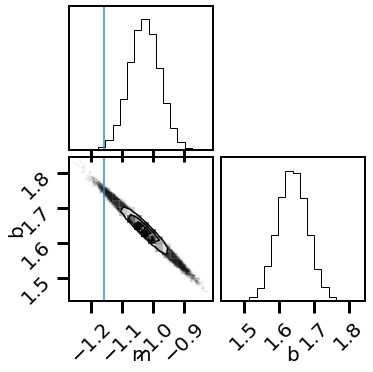

100%|██████████| 5000/5000 [00:32<00:00, 153.62it/s]


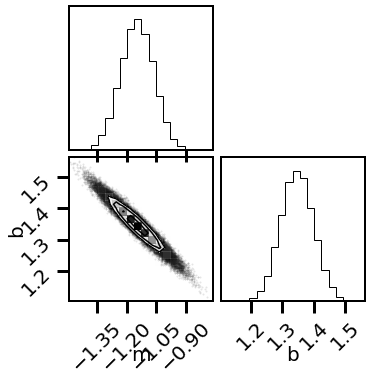

100%|██████████| 5000/5000 [00:33<00:00, 149.17it/s]


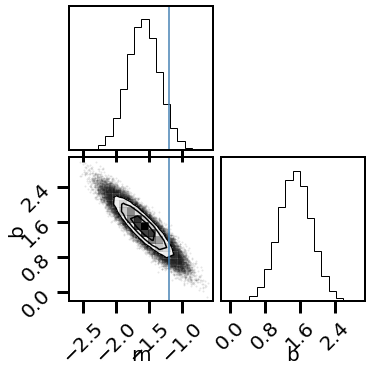

100%|██████████| 5000/5000 [00:33<00:00, 150.05it/s]


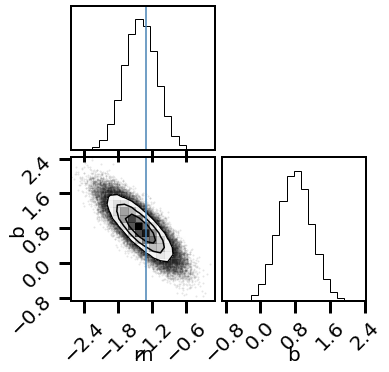

100%|██████████| 5000/5000 [00:32<00:00, 152.17it/s]


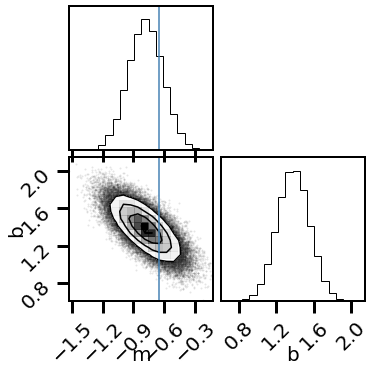

100%|██████████| 5000/5000 [00:32<00:00, 151.64it/s]


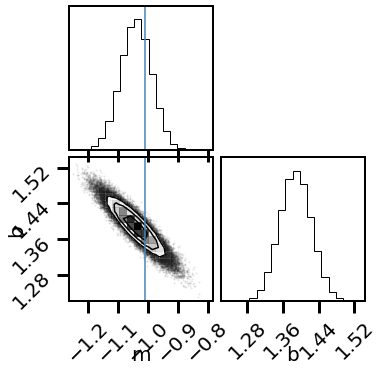

100%|██████████| 5000/5000 [00:31<00:00, 161.03it/s]


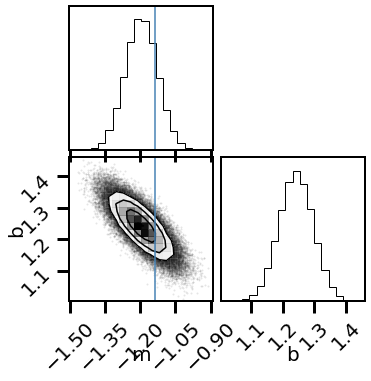

100%|██████████| 5000/5000 [00:30<00:00, 164.95it/s]


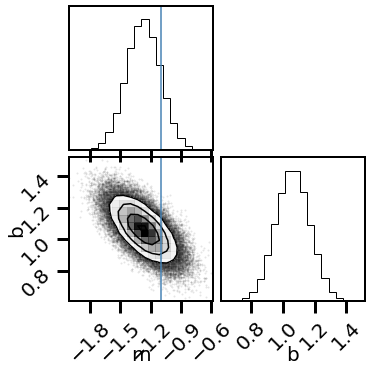

100%|██████████| 5000/5000 [00:29<00:00, 169.74it/s]


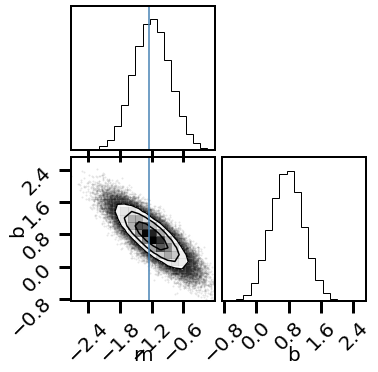

/Users/arcticfox/Documents/flares/criticality/tools.py:126: RuntimeWarning: divide by zero encountered in log10
  np.log10(lowlim[q][mask])-np.log10(y[q][mask]),
100%|██████████| 5000/5000 [00:29<00:00, 171.67it/s]


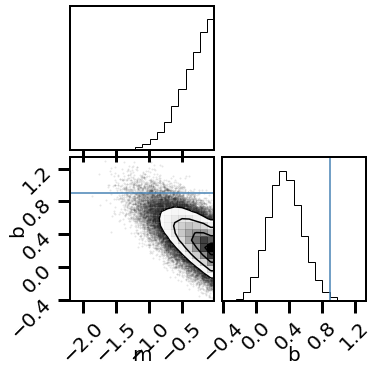

In [137]:
mcmc_fits_low = np.zeros((len(high_ruwe_slopes),3))
mcmc_fits_high= np.zeros((len(high_ruwe_slopes),3))
all_samples = []

sets = [[histplots_low_ruwe, lowlim_low_ruwe, upplim_low_ruwe],
        [histplots_high_ruwe, lowlim_high_ruwe, upplim_high_ruwe]]
set_guesses = [[low_ruwe_slopes, low_ruwe_offs],
               [high_ruwe_slopes, high_ruwe_offs]]

np.random.seed(123)

for s in range(len(sets)):

    for i in range(len(init_slopes)):

        x = sets[s][0][i][1] + 0.0
        y = sets[s][0][i][0] + 0.0
        initguess = [set_guesses[s][0][i], np.log10(set_guesses[s][1][i])]

        if i == 0:
            mask = np.arange(2,len(x)-2,1,dtype=int)

        if i == 1 or i == 2:
            if s == 1:
                mask = np.where(y!=0)[0][:-1]
            else:
                mask = np.arange(3,len(x)-2,1,dtype=int)

        else:
            mask = np.where(y!=0)[0]
            
        samples, fits = run_mcmc(x, y, 
                                 sets[s][1][i], sets[s][2][i],
                                 initguess, 
                                 mask=mask,
                                 plot_chains=False)

        all_samples.append(samples)
        
        if s == 0:
            mcmc_fits_low[i] = fits
        else:
            mcmc_fits_high[i] = fits

### Plotting histograms

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later


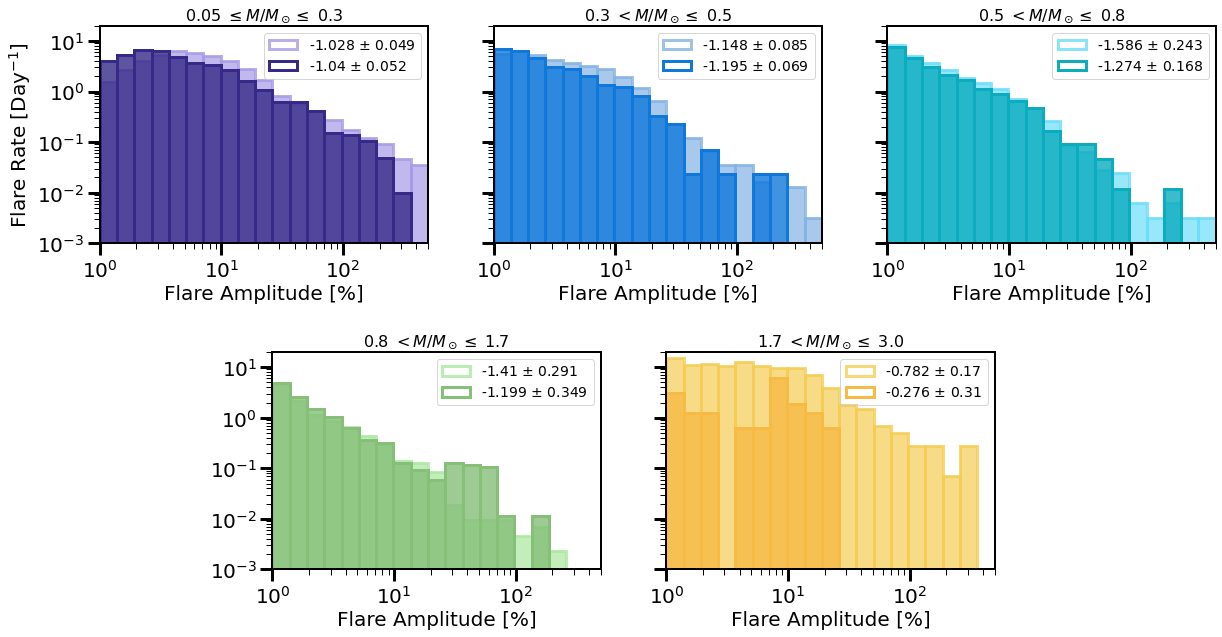

In [142]:
fig, ((ax1, ax2, ax5), (ax3, ax4, ax6)) = plt.subplots(ncols=3, nrows=2, 
                                                       figsize=(20,10),
                                                       sharey=True)   
fig.set_facecolor('w')
axes = [ax1, ax2, ax5, ax3, ax4]

oppo = ['#a79ae6', '#84b3e3', '#6cdefa', '#aae8a0', '#f5cd54']

high_ruwe_n = []
low_ruwe_n = []
#bins = np.logspace(np.log10(1), np.log10(500),20)

for i in range(len(starbins)-1):
    inds = np.where((cmd_mass>=starbins[i]) & (cmd_mass<starbins[i+1]))[0]
    dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                    (allflares['bp_rp']<  cmd_bprp[inds][-1]) &
                    (ms_dist_all < 2) & (allflares['prob'] > 0.9) & 
                    (allflares['RUWE']<1.4)]
    
    n = axes[i].hist(dat['amp']*100, bins=bins, color=oppo[i],#'#c4c2c1',#oppo[i],
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.7)
    axes[i].hist(dat['amp']*100, bins=bins, color=oppo[i],#'#c4c2c1',#oppo[i],
                 edgecolor=oppo[i], linewidth=3,fill=None,
                 weights=np.full(len(dat['amp']), 
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.8,
                 label='{0} $\pm$ {1}'.format(np.round(mcmc_fits_low[i][0],3),
                                              np.round(mcmc_fits_low[i][1], 3)))
                           
    low_ruwe_n.append(n)
    
    dat = allflares[(allflares['bp_rp']>= cmd_bprp[inds][0]) &
                     (allflares['bp_rp']<  cmd_bprp[inds][-1]) &
                     (ms_dist_all < 2) & (allflares['prob'] > 0.9) &
                     (allflares['RUWE']>=1.4)]
    
    n = axes[i].hist(dat['amp']*100, bins=bins, color=cinds[i],
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 alpha=0.8)
    
    high_ruwe_n.append(n)
    
    axes[i].hist(dat['amp']*100, bins=bins, color=cinds[i],
                 edgecolor=cinds[i], linewidth=3,fill=None,
                 weights=np.full(len(dat['amp']),
                                 1.0/np.nansum(dat['weights'])),
                 label='{0} $\pm$ {1}'.format(np.round(mcmc_fits_high[i][0],3),
                                              np.round(mcmc_fits_high[i][1], 3)))
    axes[i].legend(ncol=1, fontsize=14)
    
    if i == 0:
        axes[i].set_title('{} $\leq M/M_\odot \leq$ {}'.format(starbins[i], starbins[i+1]),
                          fontsize=16)
    else:
        axes[i].set_title('{} $< M/M_\odot \leq$ {}'.format(starbins[i], starbins[i+1]),
                          fontsize=16)
    
plt.yscale('log')
plt.ylim(10**-3, 20)

ax1.set_ylabel('Flare Rate [Day$^{-1}$]')
#ax3.set_ylabel('Flare Rate [Day$^{-1}$]')

for ax in axes:
    ax.set_xlabel('Flare Amplitude [%]')
    ax.set_xlim(1,500)
    ax.set_xscale('log')
    
plt.subplots_adjust(hspace=0.5)

axis_offset = 0.12
box = ax3.get_position()
box.x0 = box.x0 + axis_offset
box.x1 = box.x1 + axis_offset
ax3.set_position(box)

box = ax4.get_position()
box.x0 = box.x0 + axis_offset
box.x1 = box.x1 + axis_offset
ax4.set_position(box)

for ax in axes:
    ax.set_rasterized(True)

ax6.axis('off')
plt.savefig('by_ruwe.pdf', rasterize=True, bbox_inches='tight', dpi=300)

In [144]:
np.save('mcmc_fits_high.npy', mcmc_fits_high)
np.save('mcmc_fits_low.npy', mcmc_fits_low)
np.save('mcmc_fits.npy', mcmc_fits)

In [149]:
mcmc_fits

array([[-0.81684207,  0.05919413,  0.05863939],
       [-1.3423177 ,  0.08358685,  0.08388481],
       [-1.27343949,  0.14758377,  0.14814671],
       [-1.18436221,  0.1042445 ,  0.10508439],
       [-2.10958085,  0.11714807,  0.11683591]])

## Comparison

In [153]:
#mcmc_fits_high = np.load('mcmc_fits_high.npy', allow_pickle=True)
#mcmc_fits_low  = np.load('mcmc_fits_low.npy', allow_pickle=True)
#mcmc_fits = np.load('mcmc_fits.npy', allow_pickle=True)

array([[-0.81684207,  0.05919413,  0.05863939],
       [-1.3423177 ,  0.08358685,  0.08388481],
       [-1.27343949,  0.14758377,  0.14814671],
       [-1.18436221,  0.1042445 ,  0.10508439],
       [-2.10958085,  0.11714807,  0.11683591]])

In [34]:
lit = Table.read('lit_flares.csv', format='csv')
avgmass = np.zeros(len(lit))
massrange = np.zeros(len(lit))

for i in range(len(lit)):
    ran = [int(i) for i in lit['teff'][i].split('-')]
    mask = (cmd_teff>=ran[0]) & (cmd_teff<=ran[1])
    avgmass[i] = (cmd_mass[mask][-1]+cmd_mass[mask][0]) / 2.0

    massrange[i] = np.nanmedian([cmd_mass[mask][0]-avgmass[i], avgmass[i]-cmd_mass[mask][-1]])
lit.add_column(Column(avgmass, 'avg_mass'))
lit.add_column(Column(massrange, 'mass_range'))
#lit.add_column

//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later


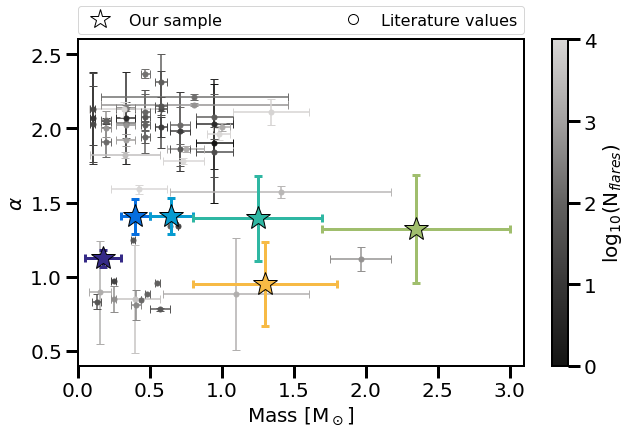

In [57]:
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('w')
logn = np.log10(lit['nflares']) +0.0

import matplotlib
import matplotlib.cm as cm


glist = ['#141413','#383737', '#636261', '#a3a1a0', '#d9d7d6']
mygray = make_cmap(glist, name='mygray')
norm = matplotlib.colors.Normalize(vmin=min(logn), vmax=4, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=mygray)
scattercolors = np.array([(mapper.to_rgba(v)) for v in logn])

#for x, y, e, color in zip(time, signal, error, time_color):
#    plt.plot(x, y, 'o', color=color)
#    plt.errorbar(x, y, e, lw=1, capsize=3, color=color)

for i in range(len(lit)):
    plt.errorbar(lit['avg_mass'][i],
                 lit['slope'][i],
                 xerr=lit['mass_range'][i],
                 yerr=lit['error'][i], capsize=4,
                 marker='o', linestyle='', color=scattercolors[i], ms=5)
    #plt.plot(lit['avg_mass'][i], lit['slope'][i], 
    #         c=scattercolors[i], zorder=100)
lw=3
for i in range(len(mcmc_fits)):
    try:
        avg = (starbins[i]+starbins[i+1])/2
        merr = np.nanmedian([avg-starbins[i], starbins[i+1]-avg])
    except:
        avg = (0.8+1.8)/2
        merr = np.nanmedian([avg-0.8, 1.8-avg])
    (_, caps, _) = plt.errorbar(avg,
                                 np.abs(mcmc_fits[i][0]),
                                 xerr=merr,
                                 yerr=mcmc_fits[i][1],# mcmc_fits[i][2]),
                                 marker='*', linestyle='', color=cinds[i], ms=25,
                                 zorder=200, capsize=4, markeredgecolor='k', 
                                 lw=lw)
    for cap in caps:
        cap.set_markeredgewidth(lw)
        
        
plt.plot(-1,0, '*', ms=10, c='w', markeredgecolor='k', lw=2, label='Our sample')
plt.plot(-1,0, 'o', ms=5, c='w', markeredgecolor='k', lw=2, label='Literature values')
plt.xlim(0,3.1)
plt.ylim(0.4,2.6)
plt.legend(ncol=2, bbox_to_anchor=(0., 1.0, 1., .102), fontsize=16, 
           loc='upper left', borderaxespad=0., mode="expand")

sc = plt.scatter(lit['avg_mass'],lit['slope'],s=0, c=logn, cmap=mygray, vmax=4)
clb = plt.colorbar(sc, label=r'log$_{10}$(N$_{flares}$)')
clb.set_ticks(np.arange(0,5,1))
plt.ylabel(r'$\alpha$')
plt.xlabel(r'Mass [M$_\odot$]')
plt.savefig('comparison.pdf', dpi=300, rasterize=True, bbox_inches='tight')

In [328]:
lit

spt_range,teff,slope,error,age,nflares,citation,avg_mass,mass_range
str9,str10,float64,float64,str8,int64,str23,float64,float64
M5.5-M8,2500-3000,2.03,0.255,Hyades,26,Ilin20,0.10400000000000001,0.018999999999999996
M5.5-M8,2500-3000,2.13,0.245,pleiades,23,Ilin20,0.10400000000000001,0.018999999999999996
M5.5-M8,2500-3000,2.07,0.31,praesepe,9,ilin20,0.10400000000000001,0.018999999999999996
M3.5-M5.5,3000-3250,1.91,0.1,hyades,137,ilin20,0.196,0.034
M3.5-M5.5,3000-3250,2.06,0.06,pleiades,616,Ilin20,0.196,0.034
M3.5-M5.5,3000-3250,2.0,0.06,praesepe,601,Ilin20,0.196,0.034
M2.5-M3,3250-3500,2.04,0.105,hyades,174,ilin20,0.335,0.065
M2.5-M3,3250-3500,2.02,0.06,pleiades,590,ilin20,0.335,0.065
M2.5-M3,3250-3500,1.92,0.04,praesepe,970,Ilin20,0.335,0.065


In [326]:
j = np.where((cmd_bprp>=np.nanmin(dat_collection[-1]['bp_rp'])) & 
             (cmd_bprp <= np.nanmax(dat_collection[-1]['bp_rp'])) &
             (cmd_mg >= np.nanmin(dat_collection[-1]['M_G'])) &
             (cmd_mg <= np.nanmax(dat_collection[-1]['M_G'])) )[0]
cmd_mass[j]

array([], dtype=float64)

In [322]:
np.nanmax(dat_collection[-1]['M_G'])

2.6457292580777754